


## Plan:
***

 > ***1. Import and Familiarity with the data.***


 > ***2. Formulation of the problem.***
  
  
>  ***3. Data cleaning.***


>  ***4. Handling Categorical Data.Correlation.***
  
  
>  ***5. Multiple linear regression for predicting 'Price'. Metrics.***
  

            
***

# <span style='color:green'> *Import and Familiarity with the data.*</span>


> ### Open csv from github:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import *

In [2]:
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Computers.csv'
df = pd.read_csv(url, index_col=0)
print(df.head())

   price  speed   hd  ram  screen  cd multi premium  ads  trend
1   1499     25   80    4      14  no    no     yes   94      1
2   1795     33   85    2      14  no    no     yes   94      1
3   1595     25  170    4      15  no    no     yes   94      1
4   1849     25  170    8      14  no    no      no   94      1
5   3295     33  340   16      14  no    no     yes   94      1



>### Get more about dataset:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6259 entries, 1 to 6259
Data columns (total 10 columns):
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null object
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(7), object(3)
memory usage: 537.9+ KB


In [4]:
df_shape = df.shape
df_shape

(6259, 10)

In [5]:
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [6]:
df.describe(include=np.object)

,cd,multi,premium
count,6259,6259,6259
unique,2,2,2
top,no,no,yes
freq,3351,5386,5647


# <span style='color:green'> *Formulation of the problem.*</span>


***


>After reviewing the data,I set myself the **main** task of **predicting "Price"** by having a set of all the parameters of computer.

>This problem can be solved by **machine learning**. Namely,**Supervised learning -> Regression**

>And also I set myself **additional tasks** to analyze all the interesting patterns that I will see in the way of analysis.


***

# <span style='color:green'> *Data cleaning.*</span>


***
>### Сheck for empty values and zeros
***

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.eq(0).any()

price      False
speed      False
hd         False
ram        False
screen     False
cd         False
multi      False
premium    False
ads        False
trend      False
dtype: bool

>### Check the dataset for outliers


In [11]:
#numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'price']
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64')]

numerical_columns

['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend']

In [12]:
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,price,speed,hd,ram,screen,ads,trend
min,949.00000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
max,5399.00000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000
mean,2219.57661,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
50%,2144.00000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000


Mean and median are most suspicious of hd and price. Let's illustrate the boxing schedule to see the outliers. But decide whether to leave this data or get rid of it (for further forecast steps)

>#### Check "Price" column for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d751d0dec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d751d18fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d751d0d348>],
 'medians': [<matplotlib.lines.Line2D at 0x1d751d1df48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d751d22948>],
 'means': []}

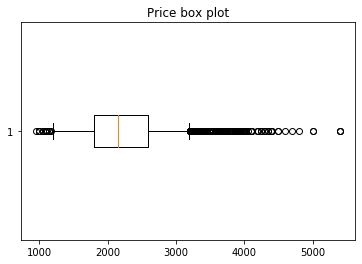

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Price box plot')
ax1.boxplot(df['price'],whis=0.75,vert=False)

In [14]:
df_price = df.loc[df['price'] > 4600]
df_price

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1123,4694,66,1100,16,14,yes,no,yes,298,8
1441,4999,66,525,8,17,no,no,yes,246,9
1507,5399,66,1200,32,17,yes,no,yes,283,10
1701,4999,66,525,8,17,yes,no,yes,283,10
1992,5399,66,1200,32,17,yes,no,yes,259,11
2097,5399,66,1200,32,17,yes,no,yes,275,12
2469,4799,66,1000,16,17,yes,no,yes,216,13


>#### Check "Hd" column for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d751dbcc48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d751dc1c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d751dbc1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d751dc5b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d751dc5c88>],
 'means': []}

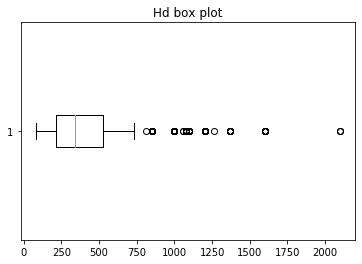

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Hd box plot')
ax1.boxplot(df['hd'],whis=0.75,vert=False)

In [16]:
df_hd = df.loc[df['hd'] > 1500]
df_hd

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
3784,3745,66,2100,16,15,yes,no,yes,273,18
4478,3485,66,2100,16,15,yes,no,yes,248,20
5961,3175,100,2100,16,15,yes,yes,yes,129,29
6186,3123,75,1600,32,15,yes,yes,yes,39,34
6194,3290,75,1600,32,17,yes,no,yes,39,34
6200,3095,100,1600,32,15,yes,no,yes,39,34
6201,3054,75,1600,32,15,yes,no,yes,39,34
6202,2885,100,1600,24,15,yes,no,yes,39,34
6206,2995,66,1600,32,15,yes,no,yes,39,34
6210,3244,75,1600,32,15,yes,no,yes,39,34


Line 5961 differs from the pattern for hd 2100. I will try to deduce values ​​which characterize it and to see whether value hd = 2100 here is erroneous, or such that will spoil the accuracy of modules, because of similar noise.

In [17]:
df[5960:5961]

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
5961,3175,100,2100,16,15,yes,yes,yes,129,29


In [18]:
df_hd = df.loc[df['speed'] == 100].loc[df['ram'] == 16].loc[df['screen'] == 15].loc[df['cd'] == 'yes'].loc[df['multi'] == 'yes'].loc[df['premium'] == 'yes']
df_hd

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
3205,3129,100,527,16,15,yes,yes,yes,307,16
3358,3029,100,527,16,15,yes,yes,yes,307,16
3587,3129,100,527,16,15,yes,yes,yes,339,17
4992,2898,100,730,16,15,yes,yes,yes,191,23
5216,2898,100,730,16,15,yes,yes,yes,182,24
5306,2898,100,730,16,15,yes,yes,yes,158,25
5403,2723,100,720,16,15,yes,yes,yes,152,26
5517,2898,100,730,16,15,yes,yes,yes,152,26
5571,2473,100,850,16,15,yes,yes,yes,163,27
5667,2898,100,730,16,15,yes,yes,yes,163,27


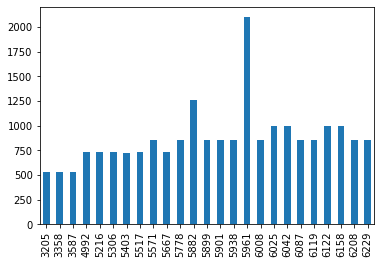

In [19]:
ax = df_hd['hd'].plot.bar()
ax

***As I suspected, this line is anomalous, for the set in which it is located.
My decision is to remove it from the sample in which I conduct research, to build a model***

In [20]:
df.drop(5961)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,no,no,yes,39,35
6256,2223,66,850,16,15,yes,yes,yes,39,35
6257,2654,100,1200,24,15,yes,no,yes,39,35
6258,2195,100,850,16,15,yes,no,yes,39,35


***Other graphics of this type did not arouse my suspicion, however, I left
a feature in which you can test each of them by selecting from a dropdown.***

>### choose column:

In [21]:
name = Dropdown(options = ['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend'])
name

Dropdown(options=('price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend'), value='price')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d751f42f08>,
 'caps': [<matplotlib.lines.Line2D at 0x1d751f47ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d751f423c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d751f4ae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d751f4af48>],
 'means': []}

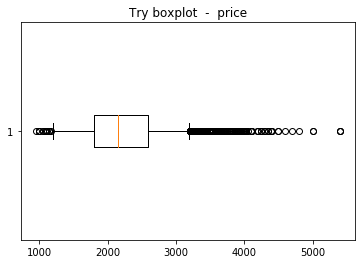

In [22]:
name_1 = name.value
fig1, ax1 = plt.subplots()
ax1.set_title('Try boxplot  -  '+ name_1)
ax1.boxplot(df[name_1],whis=0.75,vert=False)

***
This dataset is near to clean. Does not contain **zeros** or **empty** values. Also, **each column**  has meaning and can be useful for prognosis , so it is unnecessary to delete some of them. Outliers situation analyzed and corrected
***

# <span style='color:green'> *Handling Categorical Data.*</span>


In [23]:
df_without_categorical_data = df
df_without_categorical_data= df_without_categorical_data.replace({'yes': 1, 'no': 0})

Y = df_without_categorical_data[['price']]
X = df_without_categorical_data[['speed','hd',  'ram'  ,'screen' , 'cd' ,'multi','premium', 'ads' , 'trend']]

In [24]:
df_without_categorical_data

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,0,0,1,94,1
2,1795,33,85,2,14,0,0,1,94,1
3,1595,25,170,4,15,0,0,1,94,1
4,1849,25,170,8,14,0,0,0,94,1
5,3295,33,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,0,0,1,39,35
6256,2223,66,850,16,15,1,1,1,39,35
6257,2654,100,1200,24,15,1,0,1,39,35
6258,2195,100,850,16,15,1,0,1,39,35


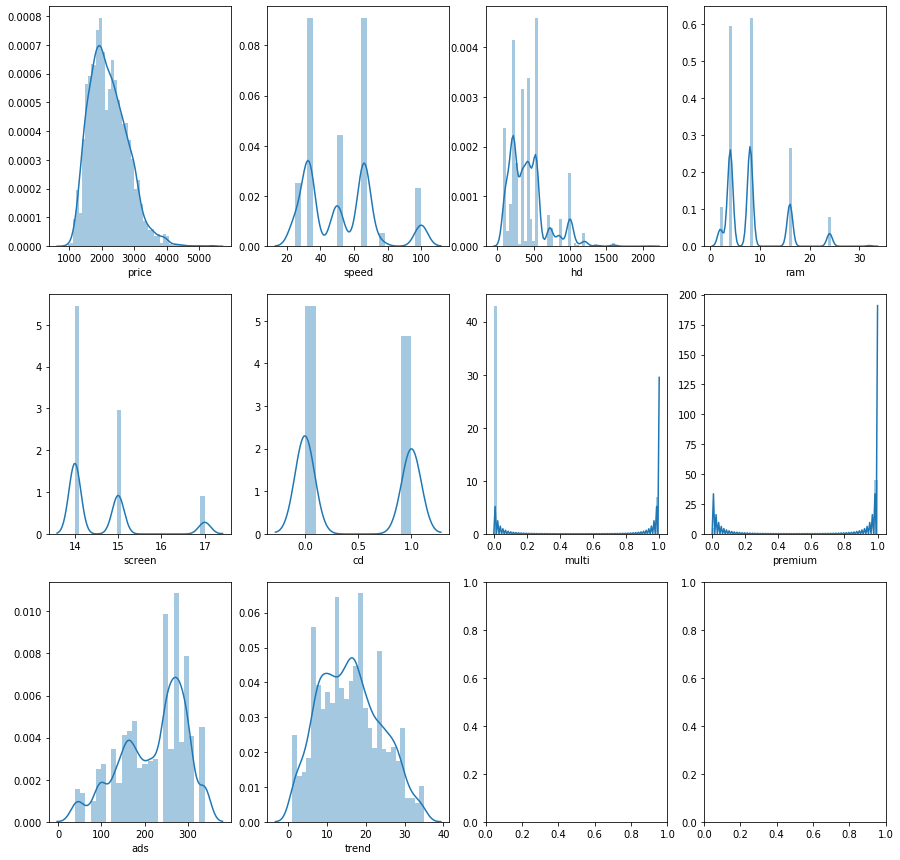

In [25]:
get_ipython().magic('matplotlib inline')
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,15))
for i, column in enumerate(df.columns):
     sns.distplot(df_without_categorical_data[column],ax=axes[i//4,i%4])

In [26]:
df_without_categorical_data.corr().style.background_gradient(cmap = "inferno")

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1,0.300976,0.430258,0.622748,0.296041,0.197343,-0.0166514,-0.0806964,0.0545405,-0.199987
speed,0.300976,1,0.372304,0.23476,0.189074,0.25826,0.0841719,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1,0.777726,0.232802,0.50357,0.0928048,0.196924,-0.323222,0.57779
ram,0.622748,0.23476,0.777726,1,0.208954,0.438504,0.0454969,0.197145,-0.18167,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1,0.129488,-0.00174041,0.0187452,-0.0939194,0.188614
cd,0.197343,0.25826,0.50357,0.438504,0.129488,1,0.432179,0.216077,-0.0610911,0.44578
multi,-0.0166514,0.0841719,0.0928048,0.0454969,-0.00174041,0.432179,1,0.124775,-0.0303943,0.210907
premium,-0.0806964,0.114208,0.196924,0.197145,0.0187452,0.216077,0.124775,1,-0.152023,0.0421074
ads,0.0545405,-0.215232,-0.323222,-0.18167,-0.0939194,-0.0610911,-0.0303943,-0.152023,1,-0.318553
trend,-0.199987,0.405438,0.57779,0.276844,0.188614,0.44578,0.210907,0.0421074,-0.318553,1


***

***good candidates for model:***

***

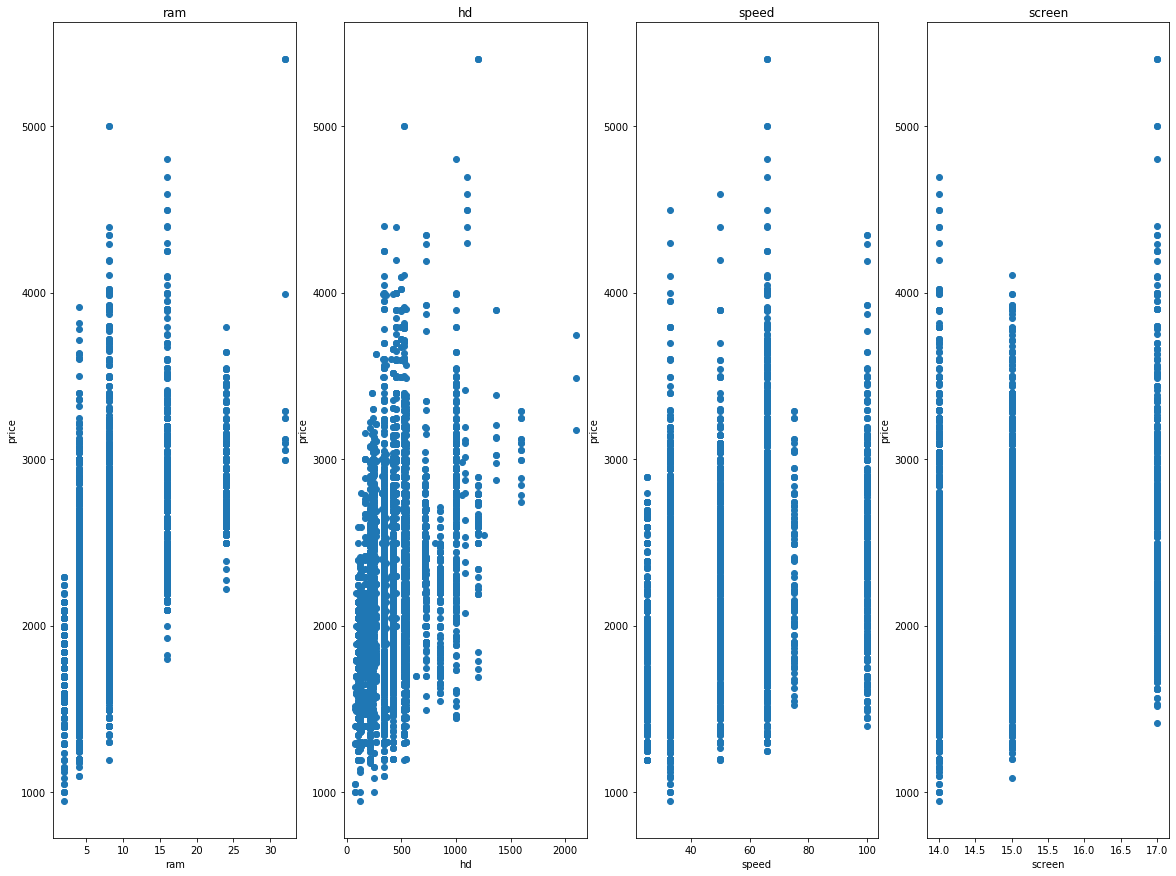

In [27]:
plt.figure(figsize=(20, 15))

features = [ 'ram', 'hd','speed','screen'] 
target = df_without_categorical_data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_without_categorical_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

***

***average candidates for model:***

***

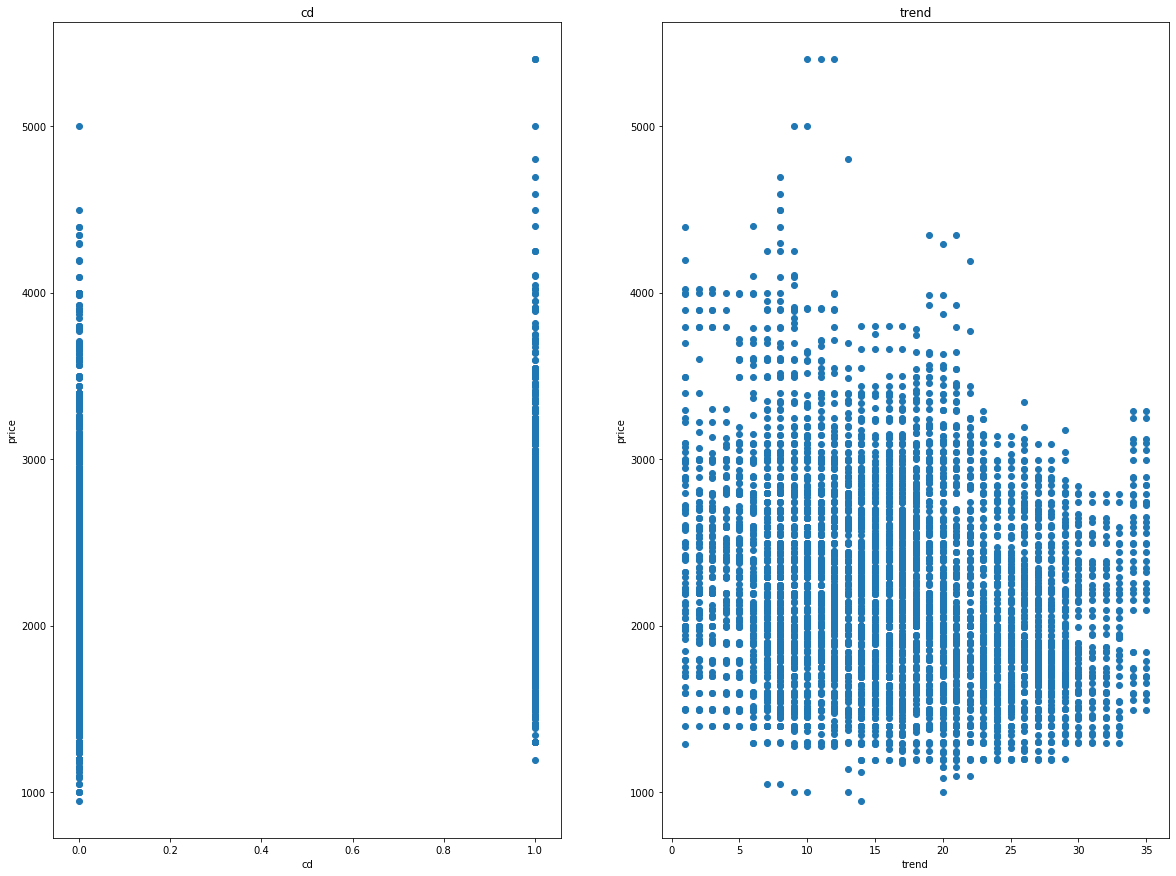

In [28]:
plt.figure(figsize=(20, 15))

features = ['cd', 'trend']
target = df_without_categorical_data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_without_categorical_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

***

***bed candidates for model:***

***

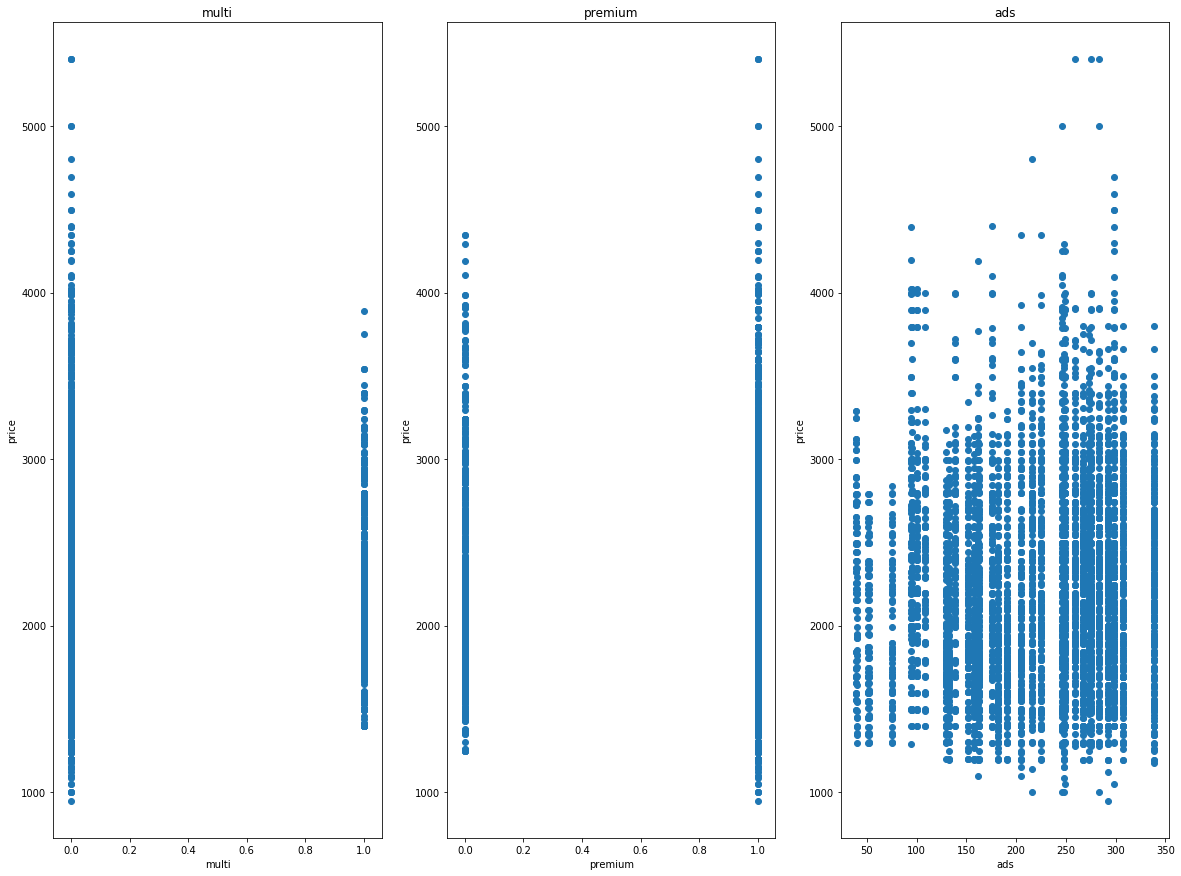

In [29]:
plt.figure(figsize=(20, 15))

features = ['multi','premium','ads']
target = df_without_categorical_data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_without_categorical_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')
 

1) Variant1: Згідно проаналізованого, я обираю колонки :  'speed', 'hd','ram', 'screen', 'cd', 'trend' для регресії.
2) Variant2: Згідно проаналізованого, я обираю колонки :  'speed', 'hd','ram','screen' для регресії.

# <span style='color:green'> *Multiple linear regression for predicting 'Price'. Metrics.*</span>


In [30]:
X1 = X[['speed','hd','ram','screen']]
X2 = X[['speed','hd','ram'  ,'screen','cd','trend']]
X3 = X

In [31]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,Y, test_size = 0.2, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y, test_size = 0.2, random_state = 0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

model_1 = LinearRegression().fit(X1_train,y1_train)
model_2 = LinearRegression().fit(X2_train,y2_train)
model_3 = LinearRegression().fit(X3_train,y3_train)

> **Train**

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y1_train_predict = model_1.predict(X1_train)
y2_train_predict = model_2 .predict(X2_train)
y3_train_predict = model_3.predict(X3_train)


train_rmse_1 = (np.sqrt(mean_squared_error(y1_train, y1_train_predict)))
train_r2_1 = r2_score(y1_train, y1_train_predict)

train_rmse_2 = (np.sqrt(mean_squared_error(y2_train, y2_train_predict)))
train_r2_2 = r2_score(y2_train, y2_train_predict)

train_rmse_3 = (np.sqrt(mean_squared_error(y3_train, y3_train_predict)))
train_r2_3 = r2_score(y3_train, y3_train_predict)

> **Test**

In [34]:
y1_test_predict = model_1.predict(X1_test)
y2_test_predict = model_2.predict(X2_test)
y3_test_predict = model_3.predict(X3_test)


test_rmse_1 = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
test_r2_1 = r2_score(y1_test, y1_test_predict)

test_rmse_2 = (np.sqrt(mean_squared_error(y2_test, y2_test_predict)))
test_r2_2 = r2_score(y2_test, y2_test_predict)

test_rmse_3 = (np.sqrt(mean_squared_error(y3_test, y3_test_predict)))
test_r2_3 = r2_score(y3_test, y3_test_predict)

> **Train results**

In [35]:
data_train = {'rms':[train_rmse_1,train_rmse_2 ,train_rmse_3], 'r2':[train_r2_1, train_r2_2, train_r2_3]} 
df_train = pd.DataFrame(data_train,index =['X1__speed,hd,ram,screen','X2__speed,hd,ram,screen,cd,trend','X3__speed,hd,ram,screen,cd,trend,multi,premium,ads']) 
df_train

,rms,r2
"X1__speed,hd,ram,screen",425.834342,0.456895
"X2__speed,hd,ram,screen,cd,trend",316.503734,0.699973
"X3__speed,hd,ram,screen,cd,trend,multi,premium,ads",275.228683,0.773123


> **Test results**

In [36]:
data_test = {'rms':[test_rmse_1,test_rmse_2 ,test_rmse_3], 'r2':[test_r2_1, test_r2_2, test_r2_3]} 
df_test = pd.DataFrame(data_test,index =['X1__speed,hd,ram,screen','X2__speed,hd,ram,screen,cd,trend','X3__speed,hd,ram,screen,cd,trend,multi,premium,ads']) 
df_test


,rms,r2
"X1__speed,hd,ram,screen",433.471260,0.463535
"X2__speed,hd,ram,screen,cd,trend",322.677598,0.702725
"X3__speed,hd,ram,screen,cd,trend,multi,premium,ads",274.876673,0.784277
